A copy of this notebook is available [here](https://gitlab.com/genepy3d/genepy3d.gitlab.io/-/blob/master/source/working_with_points.ipynb).

# Working with points

This tutorial will cover basics of the `Points` objects to handle point clouds.

## Reading points

Points are stored as an array of x,y,z components.
They can be sourced from files (`from_csv` and `from_text`) or directly from coordinates. A few random point cloud generator are also available. Let's generate a points cloud lying on an ellipsoid and plot it.

In [1]:
import genepy3d.obj.points as points
P = points.gen_ellipsoid(axes_length=[1.,0.7,0.5], n=300)

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
fig = plt.figure()
ax = plt.axes(projection="3d")

# Plot points
P.plot(ax)

ax.axis('off');
plt.tight_layout();

<IPython.core.display.Javascript object>

## PCA

One basic analysis of the points cloud is to compute its principal orientations using for example the PCA.

In [4]:
# Compute principal vectors using PCA
means, vectors, variances = P.pca()

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Plot points
P.plot(ax,point_args={"alpha":0.3})

# Plot three vectors
for i in range(3):
    ax.quiver(means[0], means[1], means[2], 
              vectors[i,0], vectors[i,1], vectors[i,2], 
              length=3*variances[i], 
              color='red');

ax.axis('off');
plt.tight_layout();

<IPython.core.display.Javascript object>

The red arrows show the orientations of the three PCA vectors.

## Points processing

The points cloud can be processed by outlier removal and smoothing. This is a part of **Point Set Processing** in CGAL. Please check [this page](https://doc.cgal.org/4.3/Point_set_processing_3/index.html) for more detail. You need to install `genepy3d_gpl` to run this cell. Let's first add to the above points cloud some random noise:

In [5]:
import numpy as np

# Add noise
new_coors = P.coors + np.random.normal(scale=0.1,size=P.coors.shape)
PNoise = points.Points(new_coors)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Plot points
P.plot(ax,point_args={"alpha":0.3})
PNoise.plot(ax,point_args={"alpha":0.3,"color":"green"});

ax.axis('off');
plt.tight_layout();

<IPython.core.display.Javascript object>

The point cloud in green is the noisy version of the blue point cloud. Now, process the noisy cloud by removing about 5% of the outliers and smoothing.

In [6]:
from genepy3d_gpl.obj.points import process

# Process the points cloud
PProcessed = process(PNoise,removed_percentage=5,smooth=True)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
PNoise.plot(ax,point_args={"alpha":0.3,"color":"green"})
PProcessed.plot(ax,point_args={"alpha":0.3,"color":"magenta"})
ax.axis('off');
plt.tight_layout();

<IPython.core.display.Javascript object>

## Distance between two points clouds

We provide the [Earth Mover's Distance](https://en.wikipedia.org/wiki/Earth_mover%27s_distance) to measure the optimal traveling distances between two points clouds. The distance can be served as input for further analysis pipelines such as similarity measurement, clustering, etc.

Let's create an example of two points clouds, each coming from a half sphere:

<IPython.core.display.Javascript object>


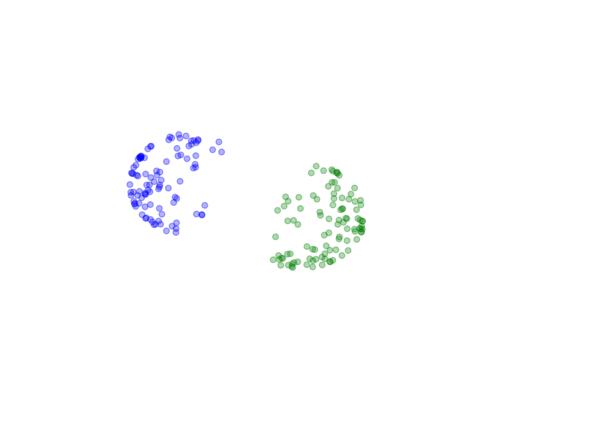

In [7]:
# Haft of sphere
P1 = points.gen_ellipsoid(axes_length=[0.5,0.5,0.5], n=300)
P1.coors = P1.coors[P1.coors[:,0]<0]
P1.coors = P1.coors[:100] # take only first 100 points

# Haft of sphere
P2 = points.gen_ellipsoid(axes_length=[0.5,0.5,0.5], n=300)
P2.coors = P2.coors[P2.coors[:,0]>0]
P2 = P2.transform(dx=1.)
P2.coors = P2.coors[:100] # take only first 100 points

# Plot them
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

P1.plot(ax,point_args={"alpha":0.3,"color":"blue"})
P2.plot(ax,point_args={"alpha":0.3,"color":"green"})

# Adjust view
ax.set_zlim(-1,1);
ax.set_xlim(0,2);
ax.set_ylim(-1,1);
ax.axis('off');
plt.tight_layout();

Now, compute EMD between P1 and P2. The return is the distance and the flows matrix that indicates the traveling between points in P1 and P2.

In [8]:
# EMD
dist, flows = points.emd(P1,P2,return_flows=True)
print("EMD distance:",dist)

EMD distance: 2.334864265116355


Let's plot the traveling trajectories between the two points clouds:

In [9]:
# Plot points clouds
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
P1.plot(ax,point_args={"alpha":0.3,"color":"blue"})
P2.plot(ax,point_args={"alpha":0.3,"color":"green"})

# Plot traveling trajectories
for i in range(P1.size):
    j = np.argwhere(flows[i]).flatten()[0]
    p1 = P1.coors[i]
    p2 = P2.coors[j]
    ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],c='magenta',lw=0.5)

# Adjust view
ax.set_zlim(-1,1);
ax.set_xlim(0,2);
ax.set_ylim(-1,1);
ax.axis('off');
plt.tight_layout();

<IPython.core.display.Javascript object>